### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [3]:
df = pd.read_csv('Real estate.csv')

#### Descriptive Analysis

In [4]:
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [6]:
df.shape  # Number of rows and columns

(414, 8)

In [11]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [8]:
df.describe().T #Statistical summary

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


#### Missing Values

In [10]:
df.isnull().sum()

# There are no missing values in the dataset. 

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

#### Feature Selection 

In [13]:
df.drop(columns=['No'],inplace = True)

#### Relationship between the variables

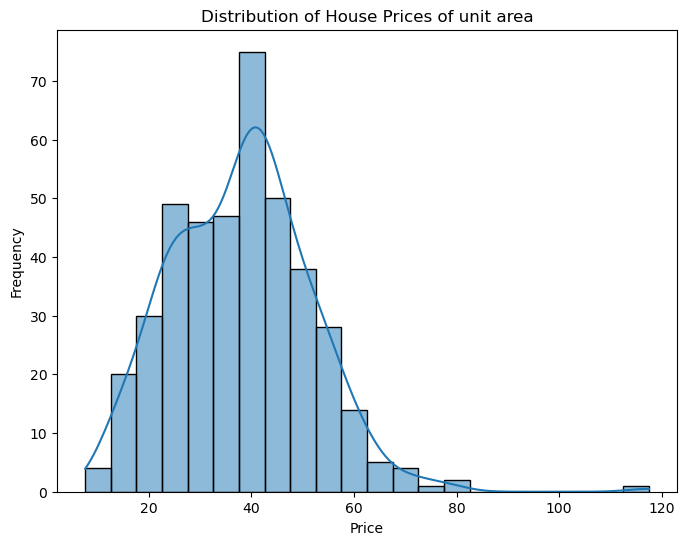

In [19]:
# Histogram for house prices

plt.figure(figsize=(8, 6))
sns.histplot(df['Y house price of unit area'], kde=True)
plt.title('Distribution of House Prices of unit area')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

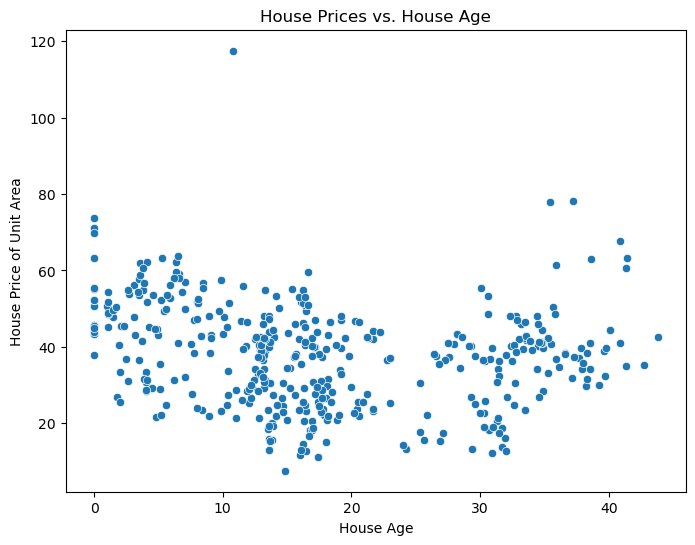

In [20]:
# Scatterplot for House Prices VS House Age

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=df)
plt.title('House Prices vs. House Age')
plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.show()

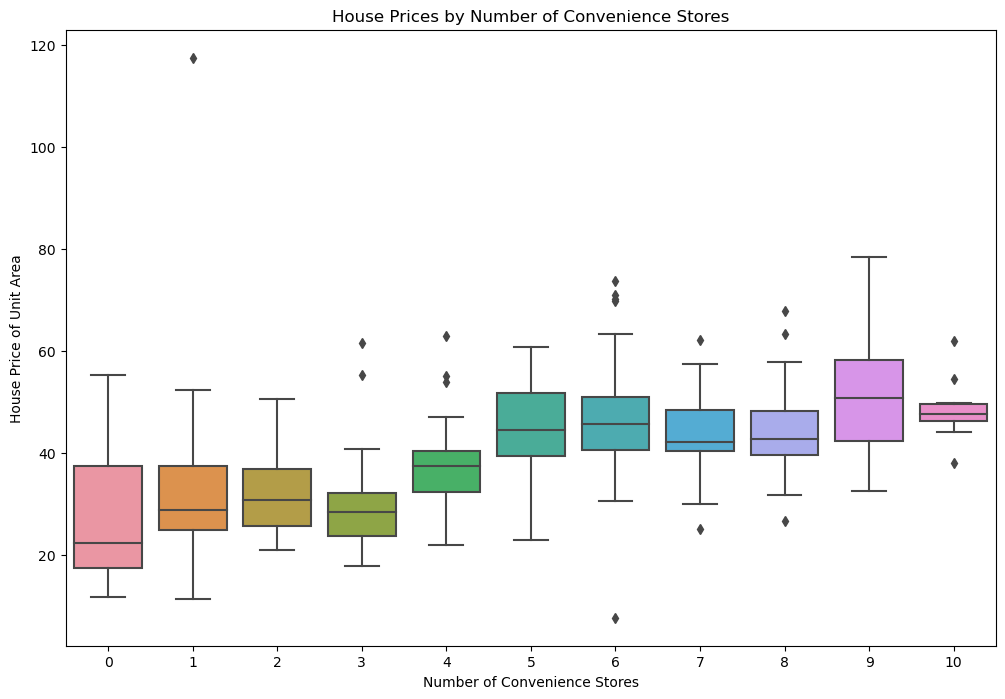

In [21]:
# Box plot for house prices across different number of convenience stores

plt.figure(figsize=(12, 8))
sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df)
plt.title('House Prices by Number of Convenience Stores')
plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.show()

#### Correlation Analysis: 

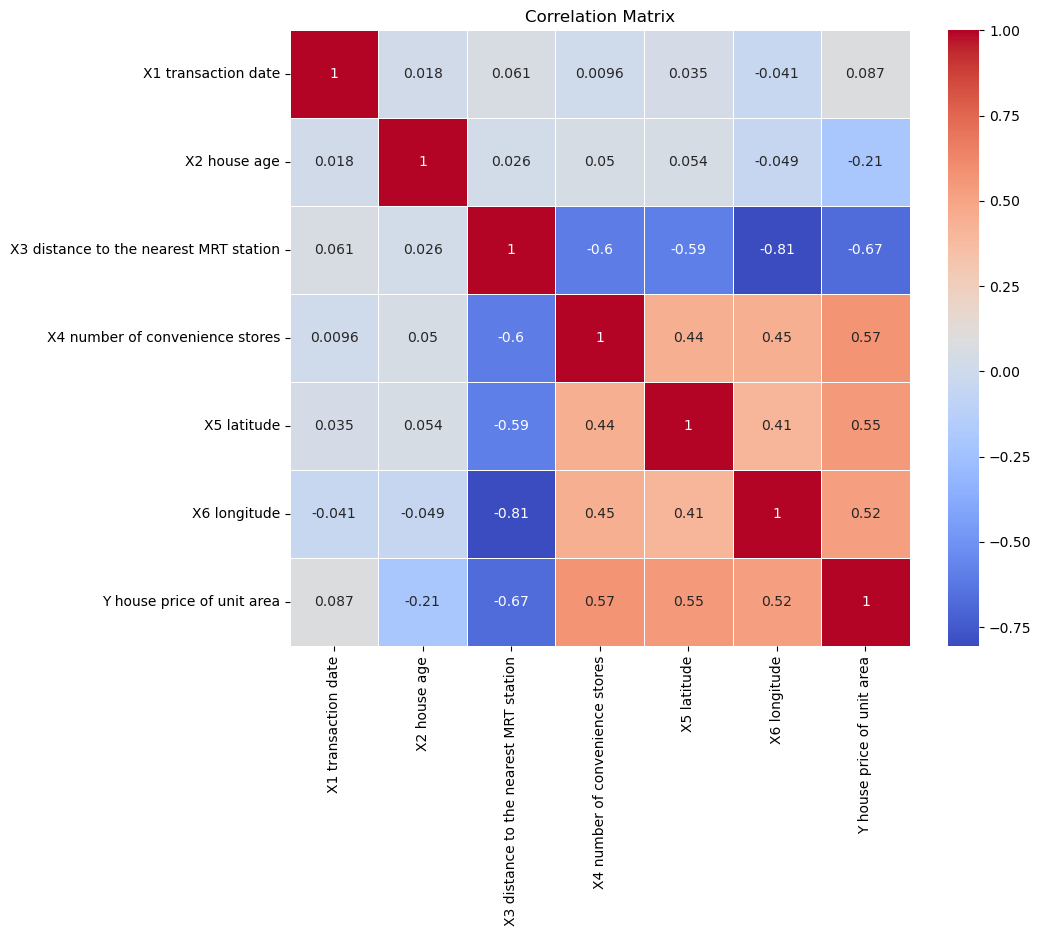

In [22]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Train Test Split

In [23]:
x = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

#### Train and Evaluate the Model 

In [25]:
model = LinearRegression()  # Create the Model
model.fit(xtrain,ytrain)  # Fit the Model 

LinearRegression()

In [26]:
model.predict(xtest)
print('R2 score is ',r2_score(ytest,model.predict(xtest)))

R2 score is  0.6810580555096022


In [28]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [30]:
print(model.coef_)
print(model.intercept_)

[ 5.44074186e+00 -2.70791490e-01 -4.75863892e-03  1.09142527e+00
  2.29043054e+02 -2.94925908e+01]
-13044.231917160485


#### Best Fit Line

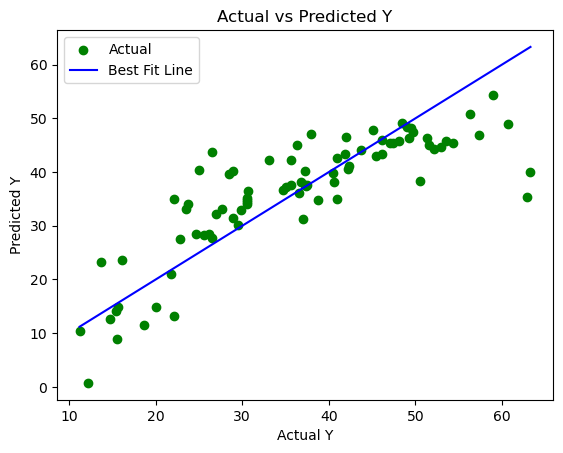

In [31]:
plt.scatter(ytest, model.predict(xtest), color='green', label='Actual')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='blue', label='Best Fit Line')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')
plt.legend()
plt.show()

#### Lasso Regression 

In [32]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
print('R2 score is ',r2_score(ytest,lasso.predict(xtest)))

R2 score is  0.6449707031292082


In [33]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

#### Lasso Regression using GridSearchCV

In [34]:
params = {
    'alpha': [1.0,0.1,100],
    'random_state' :[12,23,42,61],
    'max_iter':[50,60,100]
}
grid = GridSearchCV(estimator=lasso,param_grid=params,cv = 5)
grid.fit(xtrain,ytrain)
grid.predict(xtest)
print("R2 score is ",r2_score(ytest,grid.predict(xtest)))

R2 score is  0.66445328049598


In [35]:
grid.best_score_

0.514269273001406

In [36]:
grid.best_params_

{'alpha': 0.1, 'max_iter': 50, 'random_state': 12}

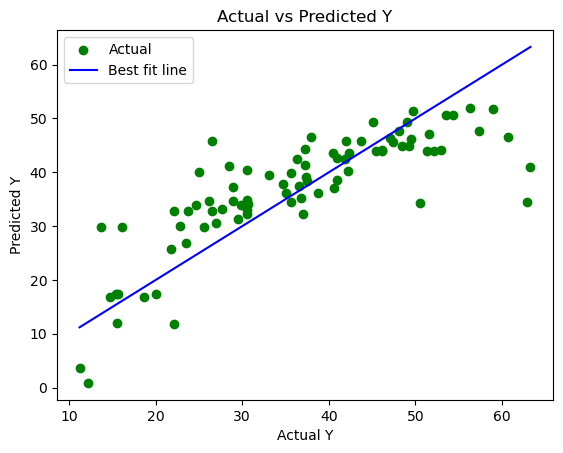

In [37]:
plt.scatter(ytest,lasso.predict(xtest), color='green', label='Actual')
plt.plot([min(ytest),max(ytest)],[min(ytest),max(ytest)],color = 'blue',label= 'Best fit line')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs Predicted Y')
plt.legend()
plt.show()

# It created more sparcity in the dataset. 